# Task 4 : Decision Tree Algorithm
# by Jagriti Sahi

In [1]:
#Importing EDA and plotting libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

#Importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Importing Evaluation libraries 
from sklearn.metrics import classification_report, confusion_matrix

#libraries to visualize DecisionTree
from sklearn import tree

In [2]:
iris = pd.read_csv(r'C:\Users\LENOVO\Desktop\JAGRITI\IRIS.csv' , encoding = 'latin')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploring Data

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


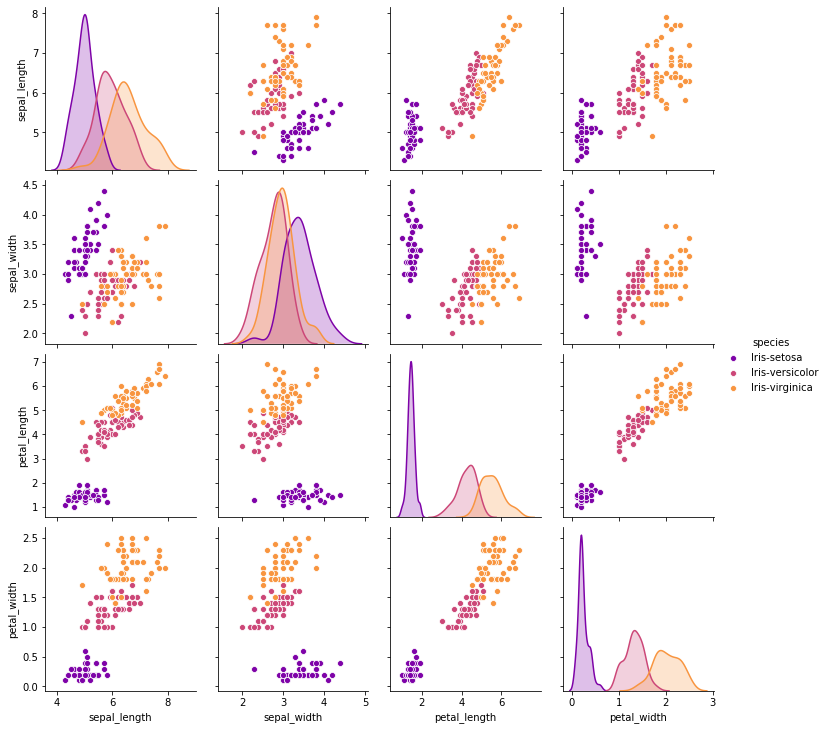

In [5]:
sns.pairplot(iris , hue = 'species', palette = 'plasma');

Hereby we can see setosa is quite distinct in leangth & width parameter from other two species, let's dig further to get the actual and acurate picture.

In [7]:
corr = iris.corr()

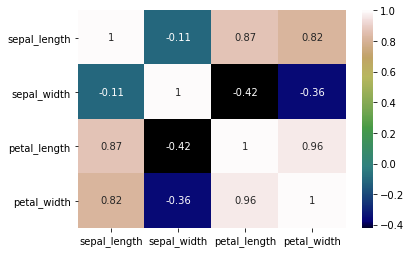

In [14]:
sns.heatmap(corr, annot = True , cmap = 'gist_earth');

# Modelling

In [15]:
#Defining features and target 
x = iris.drop('species', axis = 1)
y = iris['species']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x ,y, test_size = 0.2 , random_state = 1)

In [17]:
model = DecisionTreeClassifier()

In [18]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Evaluation

In [19]:
model.score(x_test,y_test)

0.9666666666666667

In [20]:
y_preds = model.predict(x_test)

In [21]:
print(classification_report(y_test,y_preds))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



So, hereby we have acheived **97%** accuracy with Iris-setosa accurately predicted all the time . Let's look further to get a clear picture

In [22]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

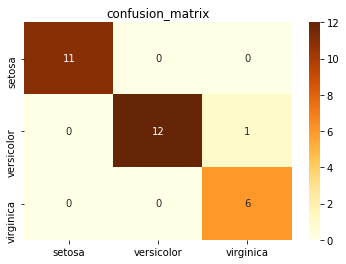

In [36]:
# sns.cubehelix_palette(as_cmap=True)
cm = confusion_matrix(y_test,y_preds)
sns.heatmap(cm , annot = True , cmap = 'YlOrBr', xticklabels = ['setosa' , 'versicolor' , 'virginica'],
           yticklabels = ['setosa' , 'versicolor' , 'virginica'] )
plt.title('confusion_matrix');

where y axis reprensents the *'true label'* x axis is *'predicted label'* and from confusion matrix we can say **for once versicolor is wrongly predicted as virginica** all other labels are correctly predicted

# Visualizing the Decision Tree

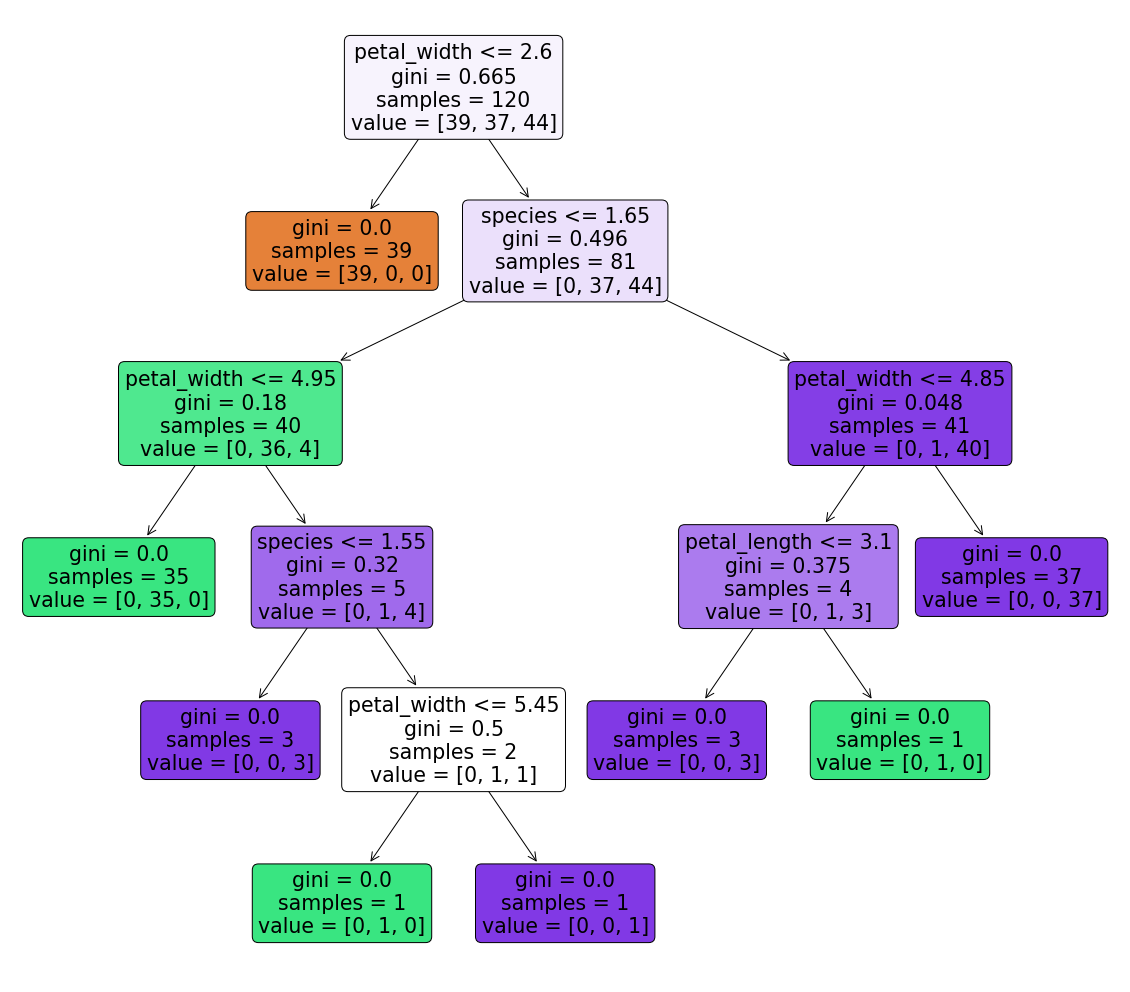

In [17]:
feature_name = list(iris.columns[1:])
Tree = plt.figure(figsize =(20,18))
Tree = tree.plot_tree(model, filled = 'True', rounded = 'True', feature_names = feature_name  );

### gini  is the measure of impurity i.e probablity of missclassification of given element .Here, gini = 0 indicates no further proceeding is required